# Linear Algebra
These examples are based on numpy, linear algebra library [numpy.linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html) and [scipy.linalg](https://docs.scipy.org/doc/scipy-0.15.1/reference/linalg.html)

## Basic

In [53]:
import numpy as np
from scipy import linalg
# scalar
3
# vector
np.array([1,2,3]).reshape([3, 1])

array([[1],
       [2],
       [3]])

In [54]:
# matrix
m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [55]:
# matrix transpose
np.transpose(m) # or m.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [56]:
# tennsor
# for example: NHWC image representation

In [57]:
# matrix multiplying
m_1 = np.array([[1, 2], [1, 2]])
m_2 = np.array([[3, 4], [3, 4]])
m_1 * m_2 # elementwise product

array([[3, 8],
       [3, 8]])

In [58]:
np.dot(m_1, m_2)

array([[ 9, 12],
       [ 9, 12]])

In [59]:
# identity matrix
np.identity(3) # equal to np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [60]:
# inverse matrix
a = np.array([[1, 2], [3, 4]])
a_inv = np.linalg.inv(a)
a_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [61]:
np.dot(a, a_inv) # output should be identity matrix

array([[  1.00000000e+00,   1.11022302e-16],
       [  0.00000000e+00,   1.00000000e+00]])

In [62]:
np.allclose(np.dot(a, a_inv), np.eye(2))

True

In [63]:
np.allclose(np.dot(a_inv, a), np.eye(2))

True

    Ax = b has a solution <=> rank(A,b) = rank(A) <=> b belongs to column space
    matrix rank == range of column space == range of row space

In [64]:
# get matrix rank by SVD
np.linalg.matrix_rank(a)

2

In [65]:
# norms
a = np.array([[1, 2], [3, 4]])
np.linalg.norm(a) # defaults to L2 norm(Frobenius norm)

5.4772255750516612

In [66]:
# L1 norm
np.linalg.norm(a, ord=1)

6.0

In [67]:
# L infinity
np.linalg.norm(a, ord=np.inf)

7.0

## Special Kinds of Matrices and Vectors
* diagonal matrix
* symmetric matrix  (A == A<sup>T</sup>)
* unit vector
* orthogonal matrix (AA<sup>T</sup> == A<sup>T</sup>A == IdentityMatrix)

In [68]:
# Diagonal matrices
diag_1 = np.diag([3, 4])
diag_1

array([[3, 0],
       [0, 4]])

In [69]:
diag_v = np.diagonal(diag_1) # get diagonal value
diag_v

array([3, 4])

In [70]:
# symmetric matrix
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
sym_mat = np.tril(a) + np.tril(a, -1).T
sym_mat

array([[1, 4, 7],
       [4, 5, 8],
       [7, 8, 9]])

In [71]:
sym_mat == sym_mat.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [72]:
# unit vector
a = np.array([1, 2, 3])
unit_vec = a / np.sqrt(np.sum(a ** 2))
np.linalg.norm(unit_vec)  # L2 norm of unit vector should be one.

1.0

In [73]:
# orthogonal matrix
a = np.array([[1,2],[3,4]])
orth_1 = linalg.orth(a)
orth_1

array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])

In [74]:
np.dot(orth_1, orth_1.T) == np.dot(orth_1.T, orth_1)

array([[ True,  True],
       [ True,  True]], dtype=bool)

In [75]:
np.allclose(np.dot(orth_1, orth_1.T), np.identity(2))

True

## Matrix Decomposition
### Eigendecomposition
Av = &#955;v  <=> A = Vdiag(&#955;)V<sup>-1</sup> (A must be square matrix.)

In [76]:
w, v = np.linalg.eig(np.diag((1, 2, 3))) 
w # eigenvalues

array([ 1.,  2.,  3.])

In [77]:
v # normalized eigenvectors

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### Singular Value Decomposition (SVD)
More generally applicable than eigendecomposition<br/>
A = UDV<sup>T</sup>

In [78]:
a = np.random.randn(9, 6) + 1j*np.random.randn(9, 6)
U, s, V = np.linalg.svd(a, full_matrices=True)
S = np.zeros((9, 6), dtype=complex)
S[:6, :6] = np.diag(s)
np.allclose(a, np.dot(U, np.dot(S, V)))

True

## Other

In [79]:
# trace operator: the sum of the elements on the main diagonal 
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [80]:
np.trace(a)

3

In [81]:
# determinant: equal to the product of all the eigenvalues of the matrix
a = np.array([[1, 2], [3, 4]])
np.linalg.det(a)

-2.0000000000000004

In [82]:
w, v = np.linalg.eig(a)
np.prod(w)

-1.9999999999999998

# PCA
Refered to [UFLDL](http://deeplearning.stanford.edu/wiki/index.php/UFLDL%E6%95%99%E7%A8%8B), matlab code can be found [here](http://www.cnblogs.com/1024incn/p/4593200.html)

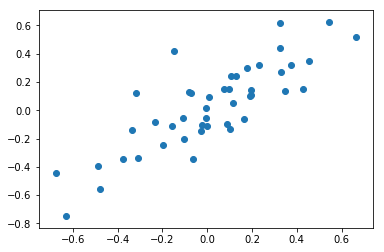

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('../data/pcaData.txt')

# raw data plot
plt.figure('pca_raw_data')
plt.scatter(data[0, :], data[1, :])

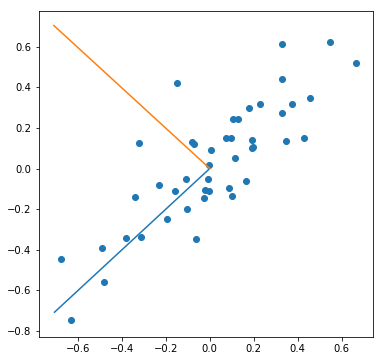

In [84]:
sigma = np.dot(data, data.T) / data.shape[1]
U, S, V = np.linalg.svd(sigma)
plt.figure('pca_raw_data_with_eigenvector', figsize=(6,6))
plt.scatter(data[0, :], data[1, :])
plt.plot((0, U[0, 0]), (0, U[0, 1]))
plt.plot((0, U[1, 0]), (0, U[1, 1]))

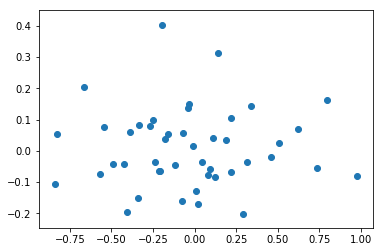

In [85]:
data_rotate = np.dot(U.T, data)
plt.figure('pca_rotate_data')
plt.scatter(data_rotate[0, :], data_rotate[1, :])

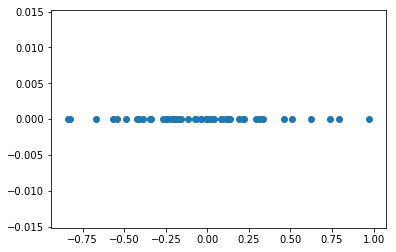

In [86]:
data_with_one_dim = data_rotate[0, :]
plt.figure('pca_rotate_data')
plt.scatter(data_with_one_dim, np.zeros(data_with_one_dim.shape))